# NAME: MOHD MUFASSIR

# Prediction using Supervised ML
(**Predict the percentage of an student based on the no. of study hours**)

In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [86]:
#Reading data from link
df=pd.read_csv("http://bit.ly/w-data")
print("Data imported successfully")
df.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


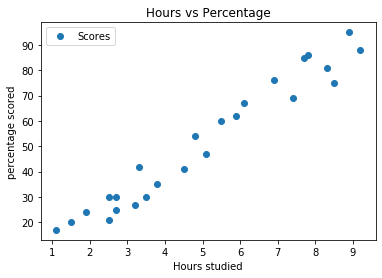

In [102]:
# Plotting the distribution of scores
df.plot('Hours','Scores',style='o')
plt.title("Hours vs Percentage")
plt.xlabel("Hours studied")
plt.ylabel("percentage scored")
plt.show()

In [27]:
#preparing the data.
X=df[["Hours"]].values
y=df["Scores"].values

In [30]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [45]:
#Splitting data in train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=0)

In [47]:
#Training the algorithm
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

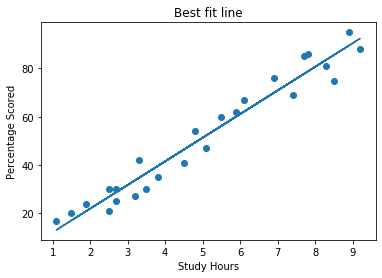

In [48]:
#Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.xlabel("Study Hours")
plt.ylabel("Percentage Scored")
plt.title("Best fit line")
plt.show()

**Making Predictions**

In [49]:
X_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9],
       [3.8],
       [1.9],
       [7.8]])

In [50]:
#predicting the score
y_pred=regressor.predict(X_test)

In [51]:
y_pred

array([17.05366541, 33.69422878, 74.80620886, 26.8422321 , 60.12335883,
       39.56736879, 20.96909209, 78.72163554])

In [56]:
#Comparing Actual Percentage vs Predicted Percentage
df=pd.DataFrame({"Hours Studied":X_test.reshape(-1), "Actual Percentage":y_test, "Predicted Percentage":y_pred})

In [55]:
df

,Hours Studied,Actual Percentage,Predicted Percentage
0,1.5,20,17.053665
1,3.2,27,33.694229
2,7.4,69,74.806209
3,2.5,30,26.842232
4,5.9,62,60.123359
5,3.8,35,39.567369
6,1.9,24,20.969092
7,7.8,86,78.721636


**Predicting Score for an student who studies 9.25hours/day:**

In [83]:
hours = [[9.25]]
own_pred = regressor.predict(hours)
print("No of Hours ={}".format(hours[0][0]))
print("Predicted Score = {}".format(own_pred[0]))


No of Hours =9.25
Predicted Score = 92.91505723477056


# Evaluating the model

In [82]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_absolute_error(y_test, y_pred)))

Mean Absolute Error: 4.419727808027652
Root Mean Squared Error: 2.1023148689070466
